In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","LAST MOD BY","CLIP LENGTH","OFFSET","DURATION"])
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce


In [3]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    spec_to = '-'.join(spec[:-2])
    return spec_to

frame['GENUS'] = frame.apply (lambda row: species(row), axis=1)
frame.head()

,IN FILE,CLIP LENGTH,OFFSET,DURATION,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,alarce,Aburria
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,alarce,Aburria
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,alarce,Aburria
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,alarce,Aburria
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,alarce,Aburria


In [4]:
LAST_MOD_BY = frame.groupby('IN FILE')[['LAST MOD BY']].max()
GENUS = frame.groupby('IN FILE')[['GENUS']].max()

In [5]:
IQR_DURATION = frame.groupby('IN FILE')[['DURATION']].quantile([.25,.5,.75])
IQR_DURATION = IQR_DURATION.unstack(1)
IQR_DURATION = IQR_DURATION['DURATION'].rename_axis([None], axis=1)
IQR_DURATION = IQR_DURATION.join(LAST_MOD_BY)
IQR_DURATION = IQR_DURATION.join(GENUS).reset_index()
IQR_DURATION = IQR_DURATION.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_DURATION.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,2.665400,3.3205,3.3855,alarce,Aburria
1,Aburria-aburri-387212.wav,3.110000,3.1400,3.1700,alarce,Aburria
2,Accipiter-bicolor-451839.wav,0.202975,0.2155,0.2215,alarce,Accipiter
3,Accipiter-collaris-260335.wav,0.895100,1.0301,1.0876,alarce,Accipiter
4,Accipiter-collaris-260336.wav,0.515075,0.5701,0.6700,alarce,Accipiter


In [6]:
annotator = IQR_DURATION['LAST MOD BY'].unique()
sampled_annotator = ['EdZamora','kkong'] # random.sample(list(annotator),1) 
# ['EdZamora','kkong','sunqiaochen','JacobGlennAyers','hjagarla', 'alarce','dnelson','weszhen'] 
# ['EdZamora'], ['kkong', 'sunqiaochen'], ['kkong', 'JacobGlennAyers'], ['kushagra1067', 'EdZamora'], ['hjagarla', 'alarce'], ['dnelson', 'sunqiaochen'], ['sunqiaochen', 'j4yang'](not gud), ['dnelson', 'hjagarla']
# ['weszhen', 'JacobGlennAyers', 'dnelson']
print(sampled_annotator)


annotator_df = IQR_DURATION[IQR_DURATION['LAST MOD BY'].isin(sampled_annotator)]
# genus_counts = annotator_df['GENUS'].value_counts()
# sampled_genus = genus_counts.index[:5]#random.sample(list(genus),1)
# print(sampled_genus)


genus = annotator_df[['LAST MOD BY','GENUS']].groupby(['GENUS','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
genus['LAST MOD BY'] = (genus['LAST MOD BY']+' '+genus['COUNT'].astype(str))
genus = genus.drop(columns = ['COUNT']).groupby('GENUS')['LAST MOD BY'].apply(list).to_dict()
# print(genus)
shared_genus_anns = [i for i in genus if len(genus.get(i)) == 2]
print(shared_genus_anns)


# for a single genus, and possibly all annotators
# random_genus = IQR_DURATION['GENUS'].unique()
# random_sampled_genus = random.sample(list(random_genus),1)
# IQR_DURATION = IQR_DURATION[IQR_DURATION['GENUS'].isin(random_sampled_genus)]
# IQR_DURATION


IQR_DURATION = annotator_df[annotator_df['GENUS'].isin(shared_genus_anns)]
IQR_DURATION


['EdZamora', 'kkong']
['Arremon', 'Automolus', 'Bolborhynchus', 'Brotogeris', 'Buteo', 'Campephilus', 'Catamenia', 'Catharus', 'Cercomacroides', 'Coccyzus', 'Coeligena', 'Coereba', 'Colaptes', 'Conopophaga', 'Contopus', 'Cranioleuca', 'Crotophaga', 'Crypturellus', 'Dacnis', 'Daptrius', 'Dendrocincla', 'Diglossa', 'Dryocopus', 'Elaenia', 'Epinecrophylla', 'Euchrepomis', 'Euphonia', 'Falco', 'Furnarius', 'Galbula', 'Glaucidium', 'Hafferia', 'Helicolestes', 'Heliodoxa', 'Hemitriccus', 'Henicorhina', 'Hirundinea', 'Ictinia', 'Iridosornis', 'Leptopogon', 'Leptotila', 'Lurocalis', 'Micrastur', 'Micropygia', 'Mimus', 'Mionectes', 'Molothrus', 'Myadestes', 'Myiarchus', 'Myiophobus', 'Myiothlypis', 'Neopelma', 'Pachyramphus', 'Phrygilus', 'Phyllomyias', 'Picumnus', 'Pipile', 'Piprites', 'Platyrinchus', 'Psarocolius', 'Pyrilia', 'Pyrrhomyias', 'Ramphastos', 'Ramphocelus', 'Rhynchocyclus', 'Saltator', 'Sarcoramphus', 'Setophaga', 'Sporophila', 'Tachyphonus']


,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
138,Arremon-brunneinucha-297000.wav,1.8751,1.91010,1.96015,kkong,Arremon
139,Arremon-castaneiceps-261298.wav,0.8323,0.91975,0.96220,EdZamora,Arremon
177,Automolus-infuscatus-270606.wav,0.8399,0.89995,1.00490,kkong,Automolus
181,Automolus-rufipileatus-47553.wav,1.1098,1.17990,1.19980,EdZamora,Automolus
197,Bolborhynchus-lineola-260395.wav,0.7901,0.94010,1.62020,EdZamora,Bolborhynchus
...,...,...,...,...,...,...
2017,Sporophila-luctuosa-10617.wav,0.6274,0.75990,0.88990,EdZamora,Sporophila
2023,Sporophila-plumbea-84743.wav,1.3500,4.16000,4.86000,kkong,Sporophila
2025,Sporophila-schistacea-371548.wav,3.1501,3.39840,3.91175,kkong,Sporophila
2091,Tachyphonus-phoenicius-357433.wav,0.5950,0.93000,1.14500,EdZamora,Tachyphonus


In [7]:
IQR_OFFSET = frame.groupby('IN FILE')[['OFFSET']].quantile([.25,.5,.75])
IQR_OFFSET = IQR_OFFSET.unstack(1)
IQR_OFFSET = IQR_OFFSET['OFFSET'].rename_axis([None], axis=1)
IQR_OFFSET = IQR_OFFSET.join(LAST_MOD_BY)
IQR_OFFSET = IQR_OFFSET.join(GENUS).reset_index()
IQR_OFFSET = IQR_OFFSET.rename(columns = {.25:'0.25',.5:'0.5',.75:'0.75'})
IQR_OFFSET.head()

,IN FILE,0.25,0.5,0.75,LAST MOD BY,GENUS
0,Aburria-aburri-257423.wav,4.546700,6.73200,12.987900,alarce,Aburria
1,Aburria-aburri-387212.wav,15.521100,30.44110,54.061100,alarce,Aburria
2,Accipiter-bicolor-451839.wav,1.754000,2.75345,3.760200,alarce,Accipiter
3,Accipiter-collaris-260335.wav,6.441750,17.87295,29.574150,alarce,Accipiter
4,Accipiter-collaris-260336.wav,5.994075,8.05175,18.697625,alarce,Accipiter


In [8]:
X = IQR_DURATION.drop(columns = ['IN FILE','GENUS','LAST MOD BY']) # expand to taxa rather than species

Y = np.array(IQR_DURATION['GENUS'])
Y_2 = np.array(IQR_DURATION['LAST MOD BY'])
Y_3 = np.array(IQR_DURATION['IN FILE'])

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 4.99517169e-01,  3.56763059e-01,  2.12385409e-01],
       [-3.81630867e-01, -4.13044237e-01, -4.99749811e-01],
       [-3.75208998e-01, -4.28434942e-01, -4.69279172e-01],
       [-1.47148147e-01, -2.10827477e-01, -3.30198903e-01],
       [-4.17289140e-01, -3.97226013e-01, -3.02022638e-02],
       [-6.22450957e-01, -6.34538244e-01, -6.38901440e-01],
       [ 2.15104142e-02, -4.80591148e-02,  1.28859838e+00],
       [-6.96217953e-01, -6.15027805e-01, -6.22702763e-01],
       [ 4.77970108e-01,  4.10747122e-01,  5.15147241e-01],
       [ 2.92327393e-01,  2.16769831e-01,  1.19510617e-01],
       [ 7.20908074e-03, -3.20076979e-02, -1.49872664e-01],
       [ 1.48659197e-01,  3.29324076e-01,  6.09895228e-01],
       [-6.28619331e-01, -6.69361657e-01, -6.86855232e-01],
       [-5.46318009e-01, -5.76162389e-01, -6.31622739e-01],
       [-6.94105496e-01, -7.47092489e-01, -8.29592691e-01],
       [ 6.02710690e-01,  4.38108375e-01,  2.72773648e-01],
       [-7.44888961e-01, -6.77134740e-01

In [10]:
wcss = []
for i in range(1,21):
    kmeans_iqr = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_iqr.fit(X_std)
    wcss.append(kmeans_iqr.inertia_)

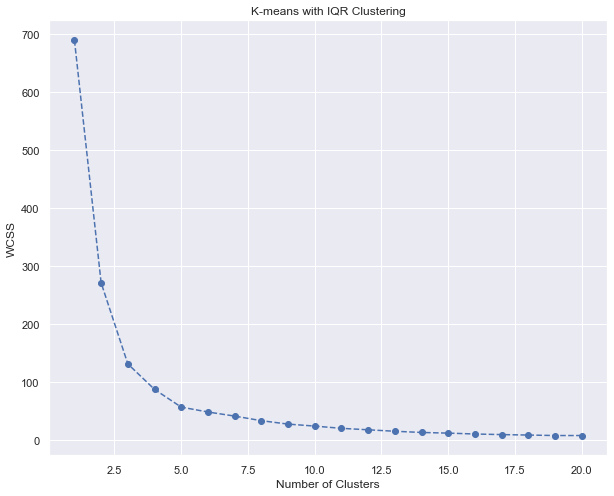

In [11]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with IQR Clustering')
plt.show()

In [12]:
kmeans_iqr = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
kmeans_iqr.fit(X_std)

KMeans(n_clusters=5, random_state=42)

In [13]:
df_segm_iqr_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(X_std,columns = ['0.25_IQR','0.5_IQR','0.75_IQR'])], axis = 1)

df_segm_iqr_kmeans['Segment K-means IQR'] = kmeans_iqr.labels_

df_segm_iqr_kmeans['Cluster'] = df_segm_iqr_kmeans['Segment K-means IQR'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})

df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'], df_segm_iqr_kmeans['Genus'] = Y_3,Y_2, Y

In [14]:
centroids = df_segm_iqr_kmeans.groupby('Segment K-means IQR')[['0.25_IQR','0.5_IQR','0.75_IQR']].mean()

In [15]:
df_segm_iqr_kmeans['CENTROID'] = df_segm_iqr_kmeans['Segment K-means IQR'].map({i: centroids.iloc[i].values.tolist() for i in centroids.index})

In [16]:
df_segm_iqr_kmeans

,0.25,0.5,0.75,0.25_IQR,0.5_IQR,0.75_IQR,Segment K-means IQR,Cluster,IN FILE,LAST MOD BY,Genus,CENTROID
0,1.8751,1.91010,1.96015,0.499517,0.356763,0.212385,1,second,Arremon-brunneinucha-297000.wav,kkong,Arremon,"[0.6140233995153908, 0.6511371238070239, 0.759..."
1,0.8323,0.91975,0.96220,-0.381631,-0.413044,-0.499750,0,first,Arremon-castaneiceps-261298.wav,EdZamora,Arremon,"[-0.6632762994387703, -0.6899940104368311, -0...."
2,0.8399,0.89995,1.00490,-0.375209,-0.428435,-0.469279,0,first,Automolus-infuscatus-270606.wav,kkong,Automolus,"[-0.6632762994387703, -0.6899940104368311, -0...."
3,1.1098,1.17990,1.19980,-0.147148,-0.210827,-0.330199,3,fourth,Automolus-rufipileatus-47553.wav,EdZamora,Automolus,"[-0.06802188148765544, -0.10682670846854221, -..."
4,0.7901,0.94010,1.62020,-0.417289,-0.397226,-0.030202,3,fourth,Bolborhynchus-lineola-260395.wav,EdZamora,Bolborhynchus,"[-0.06802188148765544, -0.10682670846854221, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.6274,0.75990,0.88990,-0.554768,-0.537297,-0.551343,0,first,Sporophila-luctuosa-10617.wav,EdZamora,Sporophila,"[-0.6632762994387703, -0.6899940104368311, -0...."
226,1.3500,4.16000,4.86000,0.055817,2.105629,2.281713,2,third,Sporophila-plumbea-84743.wav,kkong,Sporophila,"[1.73167527240902, 2.1163688629795803, 2.14209..."
227,3.1501,3.39840,3.91175,1.576870,1.513631,1.605043,2,third,Sporophila-schistacea-371548.wav,kkong,Sporophila,"[1.73167527240902, 2.1163688629795803, 2.14209..."
228,0.5950,0.93000,1.14500,-0.582145,-0.405077,-0.369304,0,first,Tachyphonus-phoenicius-357433.wav,EdZamora,Tachyphonus,"[-0.6632762994387703, -0.6899940104368311, -0...."


In [17]:
def EuclideanDistance(row):
    X_1,Y_1,Z_1 = row['0.25_IQR'],row['0.5_IQR'],row['0.75_IQR']
    X_2,Y_2,Z_2 =row['CENTROID']
    # print(X_2)
    Distance = (((X_2-X_1)**2)+((Y_2-Y_1)**2)+((Z_2-Z_1)**2))**.05
    return Distance

In [18]:
df_segm_iqr_kmeans['Distance_to_Centroid'] = df_segm_iqr_kmeans.apply (lambda row: EuclideanDistance(row), axis=1)

In [19]:
df_segm_iqr_kmeans

,0.25,0.5,0.75,0.25_IQR,0.5_IQR,0.75_IQR,Segment K-means IQR,Cluster,IN FILE,LAST MOD BY,Genus,CENTROID,Distance_to_Centroid
0,1.8751,1.91010,1.96015,0.499517,0.356763,0.212385,1,second,Arremon-brunneinucha-297000.wav,kkong,Arremon,"[0.6140233995153908, 0.6511371238070239, 0.759...",0.955079
1,0.8323,0.91975,0.96220,-0.381631,-0.413044,-0.499750,0,first,Arremon-castaneiceps-261298.wav,EdZamora,Arremon,"[-0.6632762994387703, -0.6899940104368311, -0....",0.922365
2,0.8399,0.89995,1.00490,-0.375209,-0.428435,-0.469279,0,first,Automolus-infuscatus-270606.wav,kkong,Automolus,"[-0.6632762994387703, -0.6899940104368311, -0....",0.924384
3,1.1098,1.17990,1.19980,-0.147148,-0.210827,-0.330199,3,fourth,Automolus-rufipileatus-47553.wav,EdZamora,Automolus,"[-0.06802188148765544, -0.10682670846854221, -...",0.868367
4,0.7901,0.94010,1.62020,-0.417289,-0.397226,-0.030202,3,fourth,Bolborhynchus-lineola-260395.wav,EdZamora,Bolborhynchus,"[-0.06802188148765544, -0.10682670846854221, -...",0.926064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.6274,0.75990,0.88990,-0.554768,-0.537297,-0.551343,0,first,Sporophila-luctuosa-10617.wav,EdZamora,Sporophila,"[-0.6632762994387703, -0.6899940104368311, -0....",0.868091
226,1.3500,4.16000,4.86000,0.055817,2.105629,2.281713,2,third,Sporophila-plumbea-84743.wav,kkong,Sporophila,"[1.73167527240902, 2.1163688629795803, 2.14209...",1.053355
227,3.1501,3.39840,3.91175,1.576870,1.513631,1.605043,2,third,Sporophila-schistacea-371548.wav,kkong,Sporophila,"[1.73167527240902, 2.1163688629795803, 2.14209...",0.980589
228,0.5950,0.93000,1.14500,-0.582145,-0.405077,-0.369304,0,first,Tachyphonus-phoenicius-357433.wav,EdZamora,Tachyphonus,"[-0.6632762994387703, -0.6899940104368311, -0....",0.922966


In [20]:
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np


fig = px.scatter_3d(df_segm_iqr_kmeans, 
                    x='0.25_IQR',
                    y='0.5_IQR',
                    z='0.75_IQR' , 
                    color = df_segm_iqr_kmeans['Cluster'],
                    hover_name = list(tuple(zip(df_segm_iqr_kmeans['IN FILE'],df_segm_iqr_kmeans['LAST MOD BY'])))) 


#color = Y, color_discrete_sequence= px.colors.qualitative.G10)


clust_1 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'first']
x, y, z = clust_1['0.25_IQR'], clust_1['0.5_IQR'], clust_1['0.75_IQR']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightblue', opacity=0.50)]).data[0])


clust_2 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'second']
x2, y2, z2 = clust_2['0.25_IQR'], clust_2['0.5_IQR'], clust_2['0.75_IQR']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x2, y=y2, z=z2, color='lightblue', opacity=0.50)]).data[0])


clust_3 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'third']
x3, y3, z3 = clust_3['0.25_IQR'], clust_3['0.5_IQR'], clust_3['0.75_IQR']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x3, y=y3, z=z3, color='lightblue', opacity=0.50)]).data[0])


clust_4 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fourth']
x4, y4, z4 = clust_4['0.25_IQR'], clust_4['0.5_IQR'], clust_4['0.75_IQR']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x4, y=y4, z=z4, color='lightblue', opacity=0.50)]).data[0])


clust_5 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Cluster'] == 'fifth']
x5, y5, z5 = clust_5['0.25_IQR'], clust_5['0.5_IQR'], clust_5['0.75_IQR']
fig.add_trace(go.Figure(data=[go.Mesh3d(x=x5, y=y5, z=z5, color='lightblue', opacity=0.50)]).data[0])


fig.update_layout(title_text= (' & '.join(df_segm_iqr_kmeans['LAST MOD BY'].unique()) + ' Annotations'), title_x=0.5)
fig.show()

In [21]:
kaleidoscope_format = pd.read_csv('for_data_science_newline_fixed.csv')
for_kaleidoscope = kaleidoscope_format[kaleidoscope_format['IN FILE'].isin(df_segm_iqr_kmeans['IN FILE'].to_list())] 
for_kaleidoscope

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
1890,Arremon-brunneinucha-297000.wav,17.8416,8.2753,2.0102,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.952,kkong,11/09/2021,03:55:24
1891,Arremon-brunneinucha-297000.wav,17.8416,14.5259,1.9101,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.953,kkong,11/09/2021,03:55:24
1892,Arremon-brunneinucha-297000.wav,17.8416,0.4146,1.8401,24000,0,44100,Arremon brunneinucha Chestnut-capped Brushfinch,16.951,kkong,11/09/2021,03:55:24
1911,Arremon-castaneiceps-261298.wav,22.4131,5.8007,0.8098,24000,0,44100,Arremon castaneiceps Olive Finch,728.701,EdZamora,10/26/2021,09:58:56
1912,Arremon-castaneiceps-261298.wav,22.4131,1.8319,0.6898,24000,0,44100,Arremon castaneiceps Olive Finch,728.700,EdZamora,10/26/2021,09:58:56
...,...,...,...,...,...,...,...,...,...,...,...,...
26612,Tachyphonus-phoenicius-401522.wav,51.1920,45.2183,1.4901,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.565,kkong,11/19/2021,09:52:38
26613,Tachyphonus-phoenicius-401522.wav,51.1920,43.6983,1.3300,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.562,kkong,11/19/2021,09:52:38
26614,Tachyphonus-phoenicius-401522.wav,51.1920,46.9084,1.4801,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.564,kkong,11/19/2021,09:52:38
26615,Tachyphonus-phoenicius-401522.wav,51.1920,48.5385,1.3800,24000,0,48000,Tachyphonus phoenicius Red-shouldered Tanager,1.568,kkong,11/19/2021,09:52:38


In [22]:
clust_1 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Segment K-means IQR'] == 0].sort_values(by=['Distance_to_Centroid']).iloc[:5]
clust_2 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Segment K-means IQR'] == 1].sort_values(by=['Distance_to_Centroid']).iloc[:5]
clust_3 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Segment K-means IQR'] == 2].sort_values(by=['Distance_to_Centroid']).iloc[:5]
clust_4 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Segment K-means IQR'] == 3].sort_values(by=['Distance_to_Centroid']).iloc[:5]
clust_5 = df_segm_iqr_kmeans[df_segm_iqr_kmeans['Segment K-means IQR'] == 4].sort_values(by=['Distance_to_Centroid']).iloc[:5]

clust_1

,0.25,0.5,0.75,0.25_IQR,0.5_IQR,0.75_IQR,Segment K-means IQR,Cluster,IN FILE,LAST MOD BY,Genus,CENTROID,Distance_to_Centroid
114,0.51,0.58000,0.669950,-0.653969,-0.677135,-0.708299,0,first,Hemitriccus-griseipectus-284293.wav,EdZamora,Hemitriccus,"[-0.6632762994387703, -0.6899940104368311, -0....",0.661388
66,0.49,0.58000,0.700000,-0.670868,-0.677135,-0.686855,0,first,Diglossa-glauca-20771.wav,kkong,Diglossa,"[-0.6632762994387703, -0.6899940104368311, -0....",0.689864
12,0.54,0.59000,0.700000,-0.628619,-0.669362,-0.686855,0,first,Campephilus-melanoleucos-453548.wav,EdZamora,Campephilus,"[-0.6632762994387703, -0.6899940104368311, -0....",0.732908
113,0.52,0.56995,0.602475,-0.645519,-0.684947,-0.756449,0,first,Hemitriccus-griseipectus-284279.wav,EdZamora,Hemitriccus,"[-0.6632762994387703, -0.6899940104368311, -0....",0.746252
171,0.54,0.60000,0.630000,-0.628619,-0.661589,-0.736807,0,first,Phyllomyias-burmeisteri-334789.wav,EdZamora,Phyllomyias,"[-0.6632762994387703, -0.6899940104368311, -0....",0.747251


In [23]:
kaleidoscope_format = pd.read_csv('for_data_science_newline_fixed.csv')
five_nearest_to_centroid = kaleidoscope_format[kaleidoscope_format['IN FILE'].isin(clust_1['IN FILE'].to_list())] 
five_nearest_to_centroid

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
3916,Campephilus-melanoleucos-453548.wav,63.3208,7.2804,0.5500,24000,0,44100,Campephilus melanoleucos Crimson-crested Woodp...,167.773,EdZamora,11/21/2021,15:26:18
3917,Campephilus-melanoleucos-453548.wav,63.3208,6.4004,0.6800,24000,0,44100,Campephilus melanoleucos Crimson-crested Woodp...,167.768,EdZamora,11/21/2021,15:26:18
3918,Campephilus-melanoleucos-453548.wav,63.3208,10.2904,0.6901,24000,0,44100,Campephilus melanoleucos Crimson-crested Woodp...,167.774,EdZamora,11/21/2021,15:26:18
3919,Campephilus-melanoleucos-453548.wav,63.3208,9.2804,0.5300,24000,0,44100,Campephilus melanoleucos Crimson-crested Woodp...,167.774,EdZamora,11/21/2021,15:26:18
3920,Campephilus-melanoleucos-453548.wav,63.3208,8.3804,0.5600,24000,0,44100,Campephilus melanoleucos Crimson-crested Woodp...,167.773,EdZamora,11/21/2021,15:26:18
...,...,...,...,...,...,...,...,...,...,...,...,...
19868,Phyllomyias-burmeisteri-334789.wav,43.0498,30.7124,0.6900,24000,0,44100,Phyllomyias burmeisteri Rough-legged Tyrannulet,488.430,EdZamora,11/17/2021,10:11:51
19869,Phyllomyias-burmeisteri-334789.wav,43.0498,32.5023,0.6200,24000,0,44100,Phyllomyias burmeisteri Rough-legged Tyrannulet,488.431,EdZamora,11/17/2021,10:11:51
19870,Phyllomyias-burmeisteri-334789.wav,43.0498,35.0623,0.6000,24000,0,44100,Phyllomyias burmeisteri Rough-legged Tyrannulet,488.433,EdZamora,11/17/2021,10:11:51
19871,Phyllomyias-burmeisteri-334789.wav,43.0498,37.1923,0.5800,24000,0,44100,Phyllomyias burmeisteri Rough-legged Tyrannulet,488.434,EdZamora,11/17/2021,10:11:51


In [ ]:
#Cosine Similarity on annotations. gives similarity percentage. avoids dealing with high dimensionality